
### **COUSTMER** **EXIT** **PREDICTION** **FROM BANK** -**USING** **MACHINE** **LEARNING** **AND** **ARTIFICAL** **NEURAL** **NETWORKS**



## **Dataset** : *Kaggle*

In [ ]:
#required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Data Pre-Processing


In [ ]:
df_copy = df.copy()


In [ ]:
df.drop(columns=["RowNumber", "Surname", "CustomerId"], inplace=True)


In [ ]:
df["Geography"].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

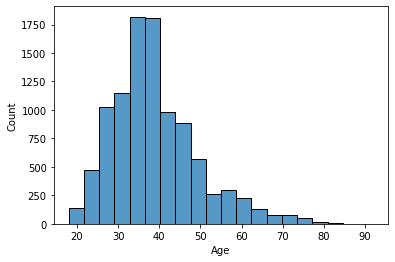

In [ ]:
sns.histplot(df["Age"], bins=20)
plt.show()

In [ ]:
df_corr = df.corr()
df_corr["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [ ]:
#Converting Categorical variables into Numerical variables


In [ ]:
df.loc[df["Geography"]=="France", "Geography"] = 1
df.loc[df["Geography"]=="Spain", "Geography"] = 2
df.loc[df["Geography"]=="Germany", "Geography"] = 3

In [ ]:
df.loc[df["Gender"]=="Male", "Gender"] = 0
df.loc[df["Gender"]=="Female", "Gender"] = 1

In [ ]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df["Age"] = df["Age"] / 100.0

In [ ]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
print("In the data there is just", round(len(df[df["Exited"]==1])/len(df["Exited"])*100, 2),"% of clients who churned from the company, which means the target class is inbalanaced.")

In the data there is just 20.37 % of clients who churned from the company, which means the target class is inbalanaced.


In [ ]:
#Creating Train and Test sets


In [ ]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
#Features Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
columns_to_scale = ["CreditScore", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Geography"]

In [ ]:
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])

In [ ]:
#Neural Networks part


In [ ]:
#Features Scaling - Part for Neural Networks


In [ ]:
X_train_neural = np.asarray(X_train).astype(np.float32)
X_test_neural = np.asarray(X_test).astype(np.float32)

In [ ]:
y_train_neural = np.array(y_train).reshape((-1,1))
y_test_neural = np.array(y_test).reshape((-1,1))

In [ ]:
X_train_neural.shape, X_test_neural.shape, y_train_neural.shape, y_test_neural.shape

((7500, 10), (2500, 10), (7500, 1), (2500, 1))

In [ ]:
#Model Building


In [ ]:
!pip install tensorflow
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import layers

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(10, kernel_initializer = 'normal', input_shape=(10,), activation="relu"))

model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Creating weights for fitting


In [ ]:
positivie_number = len(y_train_neural[y_train_neural==1])
negative_number = len(y_train_neural[y_train_neural==0])
total = len(y_train_neural)

In [ ]:
weight_for_0 = ((1 / negative_number) * (total / 2.0))
weight_for_1 = (((1 / positivie_number) * (total / 2.0))) * 2

In [ ]:
weight_for_0, weight_for_1

(0.6279303415941058, 4.908376963350785)

In [ ]:
class_weight = {1: weight_for_1,
                0: weight_for_0}

In [ ]:
history = model.fit(X_train_neural, y_train_neural, epochs=50, validation_split = 0.2)

Epoch 1/50
188/188 [==============================] - 2s 3ms/step - loss: 0.5902 - accuracy: 0.7257 - val_loss: 0.5336 - val_accuracy: 0.8080
Epoch 2/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.8010 - val_loss: 0.4825 - val_accuracy: 0.8080
Epoch 3/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8130 - val_loss: 0.4486 - val_accuracy: 0.8120
Epoch 4/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8137 - val_loss: 0.3879 - val_accuracy: 0.8320
Epoch 5/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8190 - val_loss: 0.3795 - val_accuracy: 0.8320
Epoch 6/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8230 - val_loss: 0.3852 - val_accuracy: 0.8353
Epoch 7/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8185 - val_loss: 0.3756 - val_accuracy: 0.8327
Epoch 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

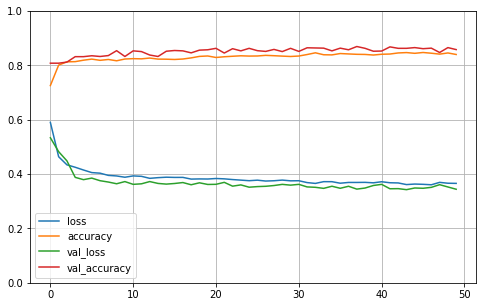

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

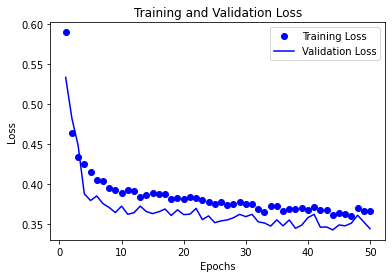

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

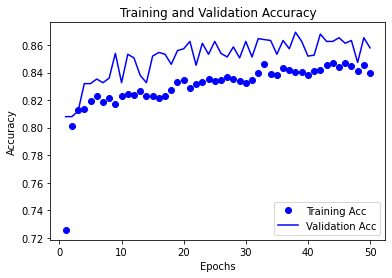

In [ ]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test_neural, y_test_neural)


79/79 [==============================] - 0s 952us/step - loss: 0.3415 - accuracy: 0.8604


[0.3414549231529236, 0.8604000210762024]

In [ ]:
y_pred_neural = model.predict(X_test_neural)
y_pred_neural

79/79 [==============================] - 0s 929us/step


array([[0.08081191],
       [0.0371404 ],
       [0.1163009 ],
       ...,
       [0.7227278 ],
       [0.08936398],
       [0.13918307]], dtype=float32)

In [ ]:
y_pred_neural[y_pred_neural>=0.5] = 1
y_pred_neural[y_pred_neural<0.5] = 0

In [ ]:
y_pred_neural

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

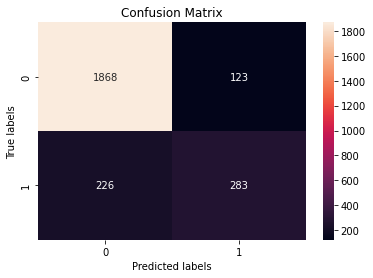

In [ ]:
cm = confusion_matrix(y_test_neural, y_pred_neural)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score

In [ ]:
acc = accuracy_score(y_test_neural, y_pred_neural)
pre = precision_score(y_test_neural, y_pred_neural)
rec = recall_score(y_test_neural, y_pred_neural)
f1 = f1_score(y_test_neural, y_pred_neural)

acc, pre, rec, f1

(0.8604, 0.6970443349753694, 0.555992141453831, 0.6185792349726776)

### NEURAL NETRWORK 

 accuracy score : 86%
 precision score : 55%
  F1 score : 61%



#**Random** **Forest** part


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features/properties to be used in the creation of the tree
max_features = ['auto', 'sqrt']
# Maximum tree depth - maximum length of the longest branch of the tree
max_depth = [int(x) for x in np.linspace(start=5, stop=60, num = 5)]
# Minimum number of samples that can be in the terminal/leaf node
min_samples_leaf = [1, 2, 4]
# Will bootsrap sampling be used Yes/No
bootstrap = [True, False]

In [ ]:
# Creating a random_grid dictionary containing individual parameters
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

In [ ]:
rfc = RandomForestClassifier(random_state=42)


In [ ]:
# Application of the created file/grid hyperparameters using RandomForest
rfc_tuned = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, random_state=42)

In [ ]:
rfc_tuned.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 18, 32, 46, 60],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42)

In [ ]:
# Sample of the best parameters
best_params_ = rfc_tuned.best_params_
best_params_

{'n_estimators': 178,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 18,
 'bootstrap': True}

In [ ]:
n_estimators = best_params_['n_estimators']
min_samples_leaf = best_params_['min_samples_leaf']
max_features = best_params_['max_features']
max_depth = best_params_['max_depth']
bootstrap = best_params_['bootstrap']

In [ ]:
rfc = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf,
                             max_features = max_features, bootstrap = bootstrap, random_state=42)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=2, n_estimators=178,
                       random_state=42)

In [ ]:
y_pred_rf = rfc.predict(X_test)

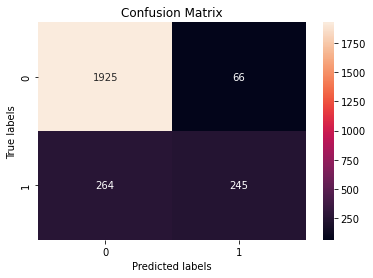

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);

In [ ]:
acc = accuracy_score(y_test, y_pred_rf)
pre = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
acc, pre, rec, f1

(0.868, 0.7877813504823151, 0.481335952848723, 0.5975609756097561)

## Random forest
   accuracy score : 86%
   precision score : 48%
   F1 score : 59%






 

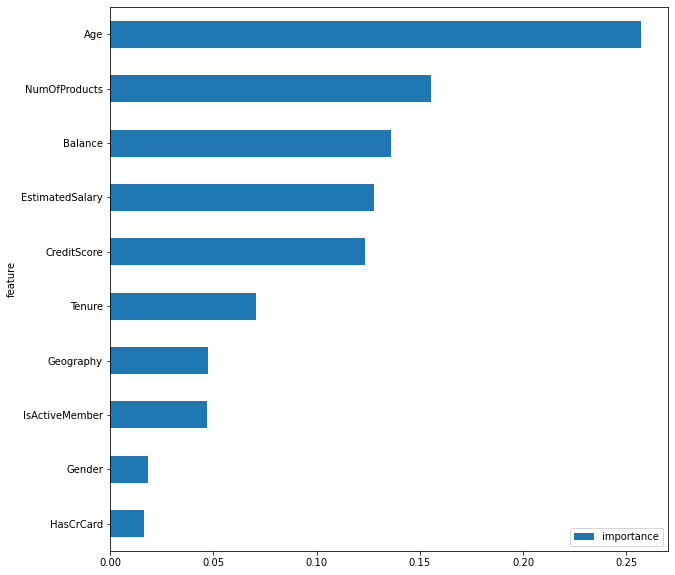

In [ ]:
# Representation of the most important parameters from the model perspective
features = pd.DataFrame()
features['feature'] = df.drop(columns=['Exited']).columns
features['importance'] = rfc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 10))
plt.show()

In [ ]:
#Deeper look at how RF model predict

In [ ]:
# Creating copy of index for merge with predict_proba_train
df_copy = df_copy.reset_index()

In [ ]:
predict_proba_train = pd.DataFrame(rfc.predict_proba(X_train))
predict_proba_train.head()

,0,1
0,0.399483,0.600517
1,0.874112,0.125888
2,0.623502,0.376498
3,0.990752,0.009248
4,0.843253,0.156747


In [ ]:
# Creating copy of index for merge with df_copy
X_train_proba = X_train.reset_index()

In [ ]:
X_train_proba['proba_0'] = predict_proba_train[0]
X_train_proba['proba_1'] = predict_proba_train[1]
X_train_proba.head()

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,proba_0,proba_1
0,5866,0.874378,-0.906672,1,0.53,1.028955,0.761715,0.803861,0,1,1.237787,0.399483,0.600517
1,1938,-1.371272,-0.906672,0,0.38,-0.699103,0.234517,-0.914771,0,1,1.095526,0.874112,0.125888
2,4194,-0.812446,1.508115,1,0.54,1.374567,0.337508,-0.914771,1,1,1.679687,0.623502,0.376498
3,6332,-0.326061,-0.906672,1,0.35,-0.353492,0.225786,-0.914771,1,1,-1.378660,0.990752,0.009248
4,1,-0.439896,0.300721,1,0.41,-1.390327,0.119901,-0.914771,0,1,0.226947,0.843253,0.156747


In [ ]:

# Merge data, from X_train_proba just ['index', 'proba_0', 'proba_1'] will be taken
df_train_proba = pd.merge(df_copy, X_train_proba[['index', 'proba_0', 'proba_1']], how='left', left_on='index', right_on='index')
df_train_proba = df_train_proba[df_train_proba['proba_0'].notna()]
df_train_proba

,index,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,proba_0,proba_1
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.410790,0.589210
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.843253,0.156747
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.029448,0.970552
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.941720,0.058280
5,5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0.491573,0.508427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0.982322,0.017678
9995,9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.995535,0.004465
9996,9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.911371,0.088629
9997,9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.604288,0.395712


In [ ]:
# Clients who did not leave company (exited = 0), but RF model says they leave company (proba_1 > 0.5)
df_train_proba[(df_train_proba['proba_1']>0.5) & (df_train_proba['Exited']!=1)]

,index,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,proba_0,proba_1
313,313,314,15797960,Skinner,806,Germany,Female,59,0,135296.33,1,1,0,182822.50,0,0.461347,0.538653
609,609,610,15586585,Duncan,698,Germany,Female,51,2,111018.98,1,1,0,86410.28,0,0.463815,0.536185
792,792,793,15707473,Summers,850,Germany,Female,48,6,111962.99,1,1,0,111755.80,0,0.496435,0.503565
1147,1147,1148,15671209,Holden,593,Germany,Female,29,5,101713.84,3,1,0,134594.99,0,0.441647,0.558353
1708,1708,1709,15772892,Robertson,699,France,Female,49,2,0.00,1,0,0,105760.01,0,0.481873,0.518127
4174,4174,4175,15810593,Forbes,568,France,Male,51,4,0.00,3,1,1,66586.56,0,0.459479,0.540521
5607,5607,5608,15771728,Mackenzie,641,Germany,Male,41,7,104405.54,3,1,0,17384.21,0,0.448953,0.551047
5624,5624,5625,15581295,Ch'ien,617,Spain,Female,45,1,0.00,1,1,0,143298.06,0,0.496111,0.503889
5900,5900,5901,15569759,Rawling,583,France,Female,27,4,0.00,3,1,0,163113.41,0,0.490908,0.509092
6763,6763,6764,15754053,Chung,718,France,Female,67,7,0.00,3,1,1,82782.08,0,0.487319,0.512681


In [ ]:
# Clients who left company (exited = 1), but RF model says they do not leave company (proba_1 < 0.5)
df_train_proba[(df_train_proba['proba_1']<0.5) & (df_train_proba['Exited']==1)]

,index,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,proba_0,proba_1
46,46,47,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1,0.543259,0.456741
114,114,115,15609618,Fanucci,721,Germany,Male,28,9,154475.54,2,0,1,101300.94,1,0.611383,0.388617
139,139,140,15640905,Vasin,579,Spain,Female,35,1,129490.36,2,0,1,8590.83,1,0.540510,0.459490
164,164,165,15658929,Taverner,683,Spain,Male,29,0,133702.89,1,1,0,55582.54,1,0.500586,0.499414
168,168,169,15574692,Pinto,667,Spain,Female,39,2,0.00,2,1,0,40721.24,1,0.611664,0.388336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,9809,9810,15763907,Watts,820,France,Female,39,1,104614.29,1,1,0,61538.43,1,0.540130,0.459870
9856,9856,9857,15687329,Hope,763,Germany,Female,32,1,108465.65,2,1,0,60552.44,1,0.594622,0.405378
9898,9898,9899,15746569,Tsui,589,France,Male,38,4,0.00,1,1,0,95483.48,1,0.545880,0.454120
9947,9947,9948,15732202,Abramovich,615,France,Male,34,1,83503.11,2,1,1,73124.53,1,0.674884,0.325116


# **CONCLUSION**

The target variable ("Excited") is quite a lot inbalanced. Its very important to pay attention to that fact. Because the task says try to help keep customers to the company, we should more focused on metric recall. We dont want to identify customers who actually left (1) as (0), which says that they dont leave the company - left down corner of the confussion matrix.

**Random** **forest** has worse accuracy and precision scores than **Neural** Networks. However, as mentioned above it is better to focus more on recall and F1 score, which is better for Random Forest. Another positive aspects about Random Forest is that it shows us features importances.

